In [46]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, TimeSeriesSplit, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#IMPORTING FUNCTIONS FOR CLASSIFIERS METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_

In [13]:
#PATHS USED
path_quick_test = [
    "./database_raw/DatasetA/zzzAD1.txt",
    "./database_raw/DatasetA/zzzAD30.txt",
    "./database_raw/DatasetA/zzzAD12.txt",
]

path = glob.glob("./database_raw/DatasetA/zzzA*.txt", recursive=True)


In [14]:
## Create pratical database with three different scenarios available on DATASETA, use to test code before apply on full database in order to save time
# df_quick_test = defs_.prepareDatabase(path_quick_test);
### Instead of creating database every time, it was exported as a csv file named 'dataframesimples' on root of project, imported using following code
# df_final.to_csv('dataframe_simples')

## Create full database with all data available on DATASETA
# df_final = defs_.prepareDatabase(path);
### Instead of creating database every time, it was exported as a csv file named 'dataframe_final' on root of project, imported using following code
# df_final.to_csv('dataframe_final')


# df_final

In [15]:
# Initiate DF's 

## Create full database with all data available on DATASETA
# df_final = defs_.prepareDatabase(path);
### Instead of creating database every time, it was exported as a csv file named 'dataframe_final' on root of project, imported using following code
#######
df_final = pd.read_csv('dataframe_final', dtype='unicode');
#######

## Create pratical database with three different scenarios available on DATASETA, use to test code before apply on full database in order to save time
# df_quick_test = defs_.prepareDatabase(path_quick_test);
### Instead of creating database every time, it was exported as a csv file named 'dataframesimples' on root of project, imported using following code
#######
df_quick_test = pd.read_csv('dataframe_simples', dtype='unicode');
#######

In [16]:
# Start random forest Model

df_rf = df_final

# Setting target variable
y = df_rf['Scenario']

# Setting other variables
X = df_rf.drop(columns=['Scenario'])
X = X.drop(X.columns[[0]], axis=1)

X


,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1,mean_S2,std_S2,median_S2,skew_S2,...,median_S29,skew_S29,amp_max_min_S29,kurtosis_S29,mean_S30,std_S30,median_S30,skew_S30,amp_max_min_S30,kurtosis_S30
0,-0.000414370442,0.043120406327645536,-0.003243883,-0.41442675239991716,0.18522184,0.18229650179968981,0.002539496899999999,0.07326709498315241,-0.0030380579999999997,-0.03624551019681481,...,-0.00332433,-0.02354757068943298,0.20867329,-0.09261218246012026,0.0026082206780000004,0.05630144437603952,0.0013889112500000001,-0.0270176906355013,0.2728724,0.5556625881783335
1,-0.00149953008,0.08873689907904413,-0.0073719135000000005,-0.008557772829157796,0.3630676,-0.6650972729370102,0.00025711601200000044,0.07111379813647783,0.0032996125,-0.1023802343223621,...,-9.137950000000011e-05,-0.33598191878862077,0.34748330000000005,0.013995772218858171,-0.003290065054,0.0653112391699274,0.0015525472000000001,-0.3633085961641189,0.25344679999999997,-0.6949649764837647
2,-0.002099744577200001,0.12369873116059492,-0.01570684,0.588571492652289,0.6131021999999999,0.7530364721892133,-0.0053900647,0.14869303266240297,-0.0086230175,-0.12974639665247198,...,0.01911307,-0.417049573113767,0.4983139,-0.38685487627178805,0.002435254539999999,0.12316842935483063,0.0095598715,-0.20858393789052662,0.50685,-0.6315823705462122
3,-0.0033677626000000005,0.1388221230414223,-0.042125805,0.26839345162009703,0.5585321,-0.7062843969531509,0.0016413805600000008,0.11507735752260885,0.003905859,-0.29731727299277966,...,-0.0148334225,0.06925917396814457,0.681977,0.018615043190842062,-0.005249770819999999,0.11419204169476571,0.0048140744999999995,0.06931212580263177,0.5114897,-0.5375619884710399
4,0.0033172219000000003,0.13300805870201626,-0.0047542875,0.3868517885124701,0.5399411000000001,-0.14875481556053805,0.004867889820000002,0.16221732911934414,0.027308365,0.282987007134251,...,-0.018194605000000003,0.32182510708430795,0.530455,-0.5500877540563107,-1.9895200000000397e-06,0.11270303133598643,-0.0029228609999999997,0.5809104505583018,0.5124597,0.70313499094634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162528,0.014895218723999999,0.1436816838486326,-0.0041809065,1.12900580926754,0.8092328,3.0430900402674945,0.005905574820200001,0.12153671923777914,3.9536505e-05,0.4362966729820596,...,0.0073365098,-0.07322779606086158,0.5400841000000001,-0.42105004936897306,0.0065484234279999986,0.10981191370481382,0.026138124999999998,-0.5863665072579036,0.4496974,-0.20020082177117304
162529,0.014240604980000002,0.13816677091787724,0.0084757445,-0.042066688930058285,0.6926772000000001,0.1608569660924406,0.010850616999999998,0.1367264908983254,0.040029999999999996,-0.6381983171353267,...,0.014571830000000001,0.3525890771414916,0.7216627,1.1391818207869386,0.0032942288200000004,0.16266539283127435,0.0002579104999999998,0.12494271506529496,0.67206,-0.7725851436083033
162530,-0.0018931615239999972,0.16121013599053424,2.1088900000000035e-05,0.03225879191744855,0.7634951,0.19964847471308333,0.0035580945799999998,0.13752647299896875,0.0064928979999999996,0.15845097102107691,...,-0.00043549855,-0.2598417655695789,0.6364637,-0.5843366819730242,-0.00022290461999999845,0.17004421492624752,-0.0046039345,0.04561572618057951,0.6937398,-0.6636288784607522
162531,-0.004739137999999999,0.18341791502114752,0.01831918,-0.08421640261440295,0.8631911000000001,-0.13082919282190275,-0.00969176552,0.15705896655829976,-0.0031893155,-0.07167013856599413,...,-0.015859768,0.013559759978589134,0.6566634,-0.09818481373975851,0.0014228850600000004,0.12784962043644352,-0.007478978,0.12382761824959346,0.53823,-0.23521563162570214


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True) 

std_scaler = StandardScaler()
X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index)

X_scaled_train,X_scaled_test, y_train,y_test

(         mean_S1    std_S1  median_S1   skew_S1  amp_max_min_S1  kurtosis_S1  \
 128272  1.369072 -0.909796  -0.347104  0.464146       -1.084510    -0.877969   
 68753  -0.927534 -0.775826  -0.685264 -0.158677       -0.459833     1.075246   
 121190  1.176754 -0.295098   1.092342 -0.366910       -0.105164     0.684652   
 109000 -0.308436  0.154994  -1.238780  1.372951       -0.875691    -1.212969   
 36436  -1.473728  0.758890  -0.129413 -0.177336        0.433520    -0.791473   
 ...          ...       ...        ...       ...             ...          ...   
 97639   0.010886 -0.418020   0.515426 -1.062645       -0.795585    -0.553788   
 95939  -0.511811 -1.052413  -0.819643  0.610680       -0.495032     1.881614   
 152315 -0.453156  1.146649   0.237683  0.747216        0.946847    -0.206320   
 117952  1.831604 -0.269695   1.429675  0.260412       -0.252053    -0.656592   
 43567  -0.096059  0.237017  -0.791605  1.626521        0.136167     0.530120   
 
          mean_S2    std_S

In [57]:
rf = RandomForestClassifier(n_estimators=1000, max_features=0.1)

rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)

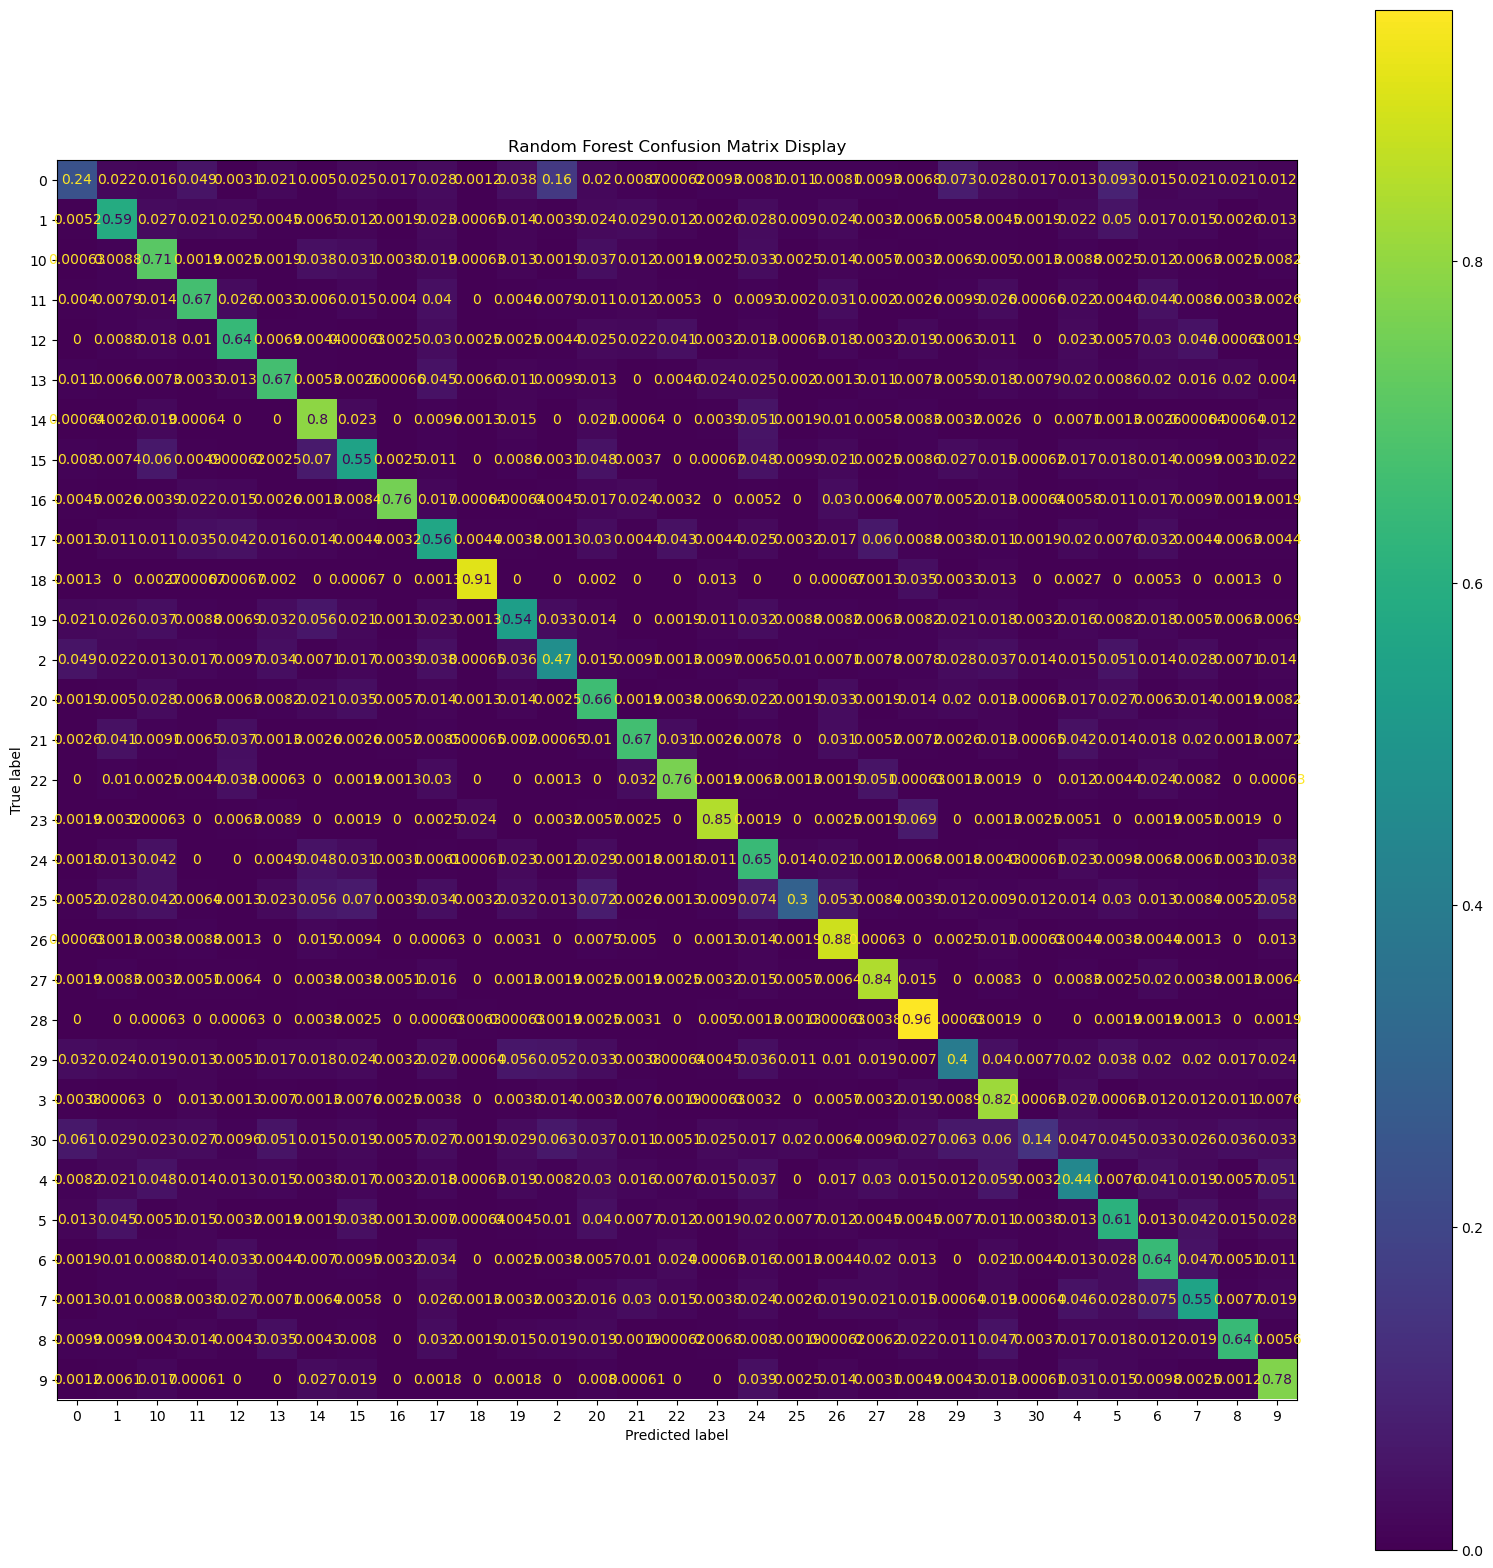

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=rf.classes_)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=rf.classes_)


fig, ax = plt.subplots(figsize=(20,20))
plt.title('Random Forest Confusion Matrix Display')
display.plot(ax=ax)


In [59]:
print(classification_report(y_test, y_pred, target_names=rf.classes_))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32      1614
           1       0.60      0.59      0.59      1550
          10       0.59      0.71      0.65      1587
          11       0.66      0.67      0.67      1510
          12       0.66      0.64      0.65      1585
          13       0.67      0.67      0.67      1516
          14       0.63      0.80      0.71      1557
          15       0.55      0.55      0.55      1621
          16       0.90      0.76      0.82      1553
          17       0.50      0.56      0.53      1587
          18       0.93      0.91      0.92      1496
          19       0.60      0.54      0.57      1583
           2       0.52      0.47      0.49      1543
          20       0.53      0.66      0.58      1589
          21       0.71      0.67      0.69      1532
          22       0.78      0.76      0.77      1584
          23       0.82      0.85      0.83      1577
          24       0.52    

In [20]:
# et = ExtraTreesClassifier(n_estimators=100)

# et.fit(X_scaled_train,y_train)
# y_pred2 = rf.predict(X_scaled_test)